## Objective : Customer segementation based on demand, revenue and take rate.

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [70]:
data = pd.read_csv('take_rate.csv')

In [71]:
data.head()

,MASTER_CUSTOMER_NAME,OEM_NAME,SALES_MARKET,SALES_SEGMENT,FISCAL_QUARTER,MDS_VALUE,REVENUE,TakeRate
0,77 ELEKTRONIKA KFT,ROCHE DIAGNOSTICS,Medical,Monitoring - Personal,FY20-Q2,0,1806,0.000000
1,ATHER ENERGY PRIVATE LIMITED,ATHER ENERGY PRIVATE LIMITED,Automotive,Instrumentation,FY20-Q2,4156,0,0.000000
2,BLOOM ENERGY,BLOOM ENERGY,Industrial & Semiconductors,Control & Process,FY20-Q2,287205,186315,0.648718
3,BLOOM ENERGY,BLOOM ENERGY,Control & Process,Industrial & Semiconductors,FY20-Q2,251546,0,0.000000
4,BLOOM ENERGY,BLOOM ENERGY (INDIA) PVT. LTD.,Industrial & Semiconductors,Control & Process,FY20-Q2,165550,0,0.000000


In [72]:
data.shape

(497, 8)

### Exploratory data analysis

In [73]:
data.isnull().sum()

MASTER_CUSTOMER_NAME    0
OEM_NAME                0
SALES_MARKET            0
SALES_SEGMENT           0
FISCAL_QUARTER          0
MDS_VALUE               0
REVENUE                 0
TakeRate                0
dtype: int64

In [74]:
data[["MDS_VALUE","REVENUE"]].describe()

,MDS_VALUE,REVENUE
count,4.970000e+02,4.970000e+02
mean,1.024502e+06,9.602273e+05
std,1.820043e+06,2.257750e+06
min,0.000000e+00,-2.999200e+05
25%,1.095100e+04,0.000000e+00
50%,2.672780e+05,1.967000e+03
75%,1.209665e+06,8.249370e+05
max,1.297284e+07,1.599271e+07


In [75]:
data.groupby(["FISCAL_QUARTER"])["MDS_VALUE"].nunique()

FISCAL_QUARTER
FY17-Q1    35
FY17-Q2    35
FY17-Q3    29
FY17-Q4    35
FY18-Q1    38
FY18-Q2    35
FY18-Q3    35
FY18-Q4    32
FY19-Q1    33
FY19-Q2    31
FY19-Q3    27
FY19-Q4    27
FY20-Q1    29
FY20-Q2    29
Name: MDS_VALUE, dtype: int64

In [76]:
data['SALES_MARKET'].value_counts()

Medical                           153
NO VALUE                          127
Telecommunications                 77
Enterprise Computing & Storage     28
Industrial & Semiconductors        27
Automotive                         20
Servers                            16
Other                              14
Data Communications                10
Instrumentation                     6
Monitoring / Surgical               6
Wireless base stations              6
Defense & Aerospace                 3
Control & Process                   2
Multimedia                          2
Name: SALES_MARKET, dtype: int64

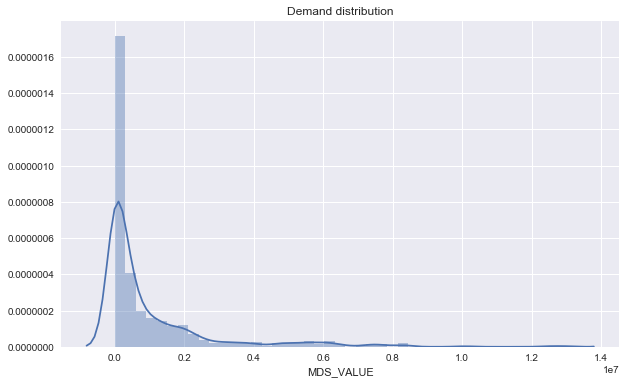

In [77]:
plt.figure(figsize=(10,6))
sns.distplot(data["MDS_VALUE"],kde=True)
plt.title("Demand distribution")
plt.show()

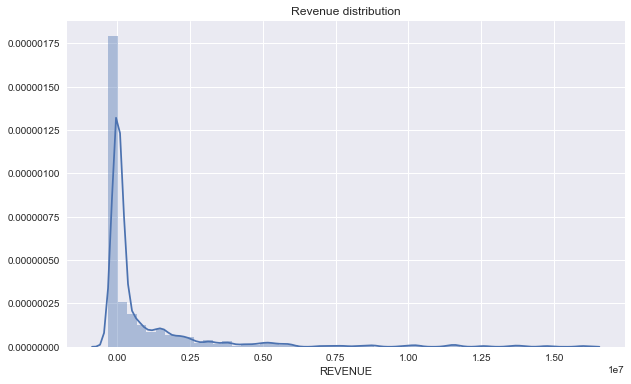

In [78]:
plt.figure(figsize=(10,6))
sns.distplot(data["REVENUE"],kde=True)
plt.title("Revenue distribution")
plt.show()

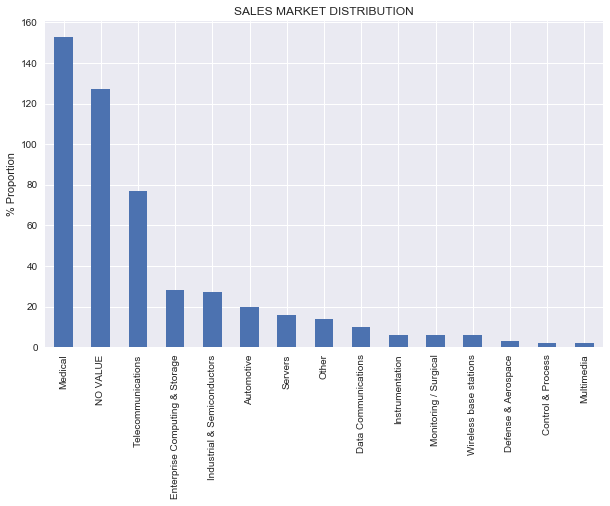

In [79]:
plt.figure(figsize=(10,6))
data['SALES_MARKET'].value_counts().plot(kind = 'bar')
plt.title('SALES MARKET DISTRIBUTION')
plt.ylabel('% Proportion')
plt.show()

### It can be seen that the medical customers play an important role in terms of sales which is propotionate to the demand and revenue

Text(0.5, 1.0, 'Quarter Revenue')

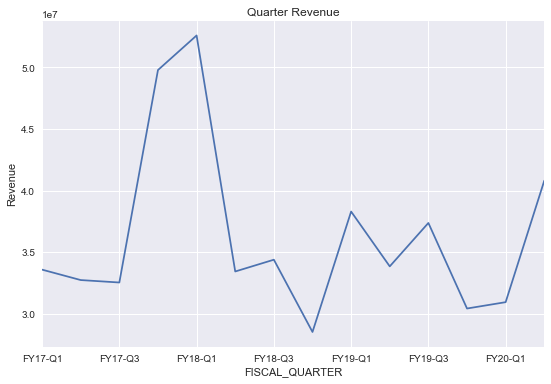

In [80]:
plt.figure(figsize=(9,6))
data.groupby(["FISCAL_QUARTER"])["MDS_VALUE"].sum().plot()
plt.ylabel('Revenue')
plt.title('Quarter Revenue')

In [54]:
data_FR = data.groupby(['MASTER_CUSTOMER_NAME']).agg({
    'MDS_VALUE': 'count',
    'REVENUE':'sum'})

In [55]:
data_FR.rename(columns={'MDS_VALUE': 'Frequency','REVENUE': 'Total_Revenue'}, inplace=True)

In [56]:
data_FR.head()

,Frequency,Total_Revenue
MASTER_CUSTOMER_NAME,,
77 ELEKTRONIKA KFT,1,1806
ABB INC,3,197984
ADVANCED MP TECHNOLOGY INC.,4,12352
AMPHENOL,4,22739
ATHER ENERGY PRIVATE LIMITED,11,6248051


In [57]:
frequency_quartile = pd.qcut(data_FR['Frequency'], q=4, labels=range(1,5))
total_revenue_quartile = pd.qcut(data_FR['Total_Revenue'], q=4, labels=range(1,5))

In [58]:
data_FR["F"] = frequency_quartile
data_FR["R"] = total_revenue_quartile

In [59]:
data_FR.head()

,Frequency,Total_Revenue,F,R
MASTER_CUSTOMER_NAME,,,,
77 ELEKTRONIKA KFT,1,1806,1,1
ABB INC,3,197984,2,2
ADVANCED MP TECHNOLOGY INC.,4,12352,2,1
AMPHENOL,4,22739,2,1
ATHER ENERGY PRIVATE LIMITED,11,6248051,3,3


In [60]:
data_FR["R"].unique()

[1, 2, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

In [61]:
data_FR['Score'] = data_FR[['R','F']].sum(axis=1)
data_FR.head()

,Frequency,Total_Revenue,F,R,Score
MASTER_CUSTOMER_NAME,,,,,
77 ELEKTRONIKA KFT,1,1806,1,1,2.0
ABB INC,3,197984,2,2,4.0
ADVANCED MP TECHNOLOGY INC.,4,12352,2,1,3.0
AMPHENOL,4,22739,2,1,3.0
ATHER ENERGY PRIVATE LIMITED,11,6248051,3,3,6.0


In [62]:
data_FR['Score'].unique()

array([2., 4., 3., 6., 8., 7., 5.])

In [63]:
def level(df):
    if np.bool(df['Score'] >= 7):
        return 'High Value Customer'
    elif np.bool((df['Score'] < 7) & (df['Score'] >= 5)):
        return 'Mid Value Customer'
    else:
        return 'Low Value Customer'

data_FR['type'] = data_FR.apply(level, axis=1)

data_FR

,Frequency,Total_Revenue,F,R,Score,type
MASTER_CUSTOMER_NAME,,,,,,
77 ELEKTRONIKA KFT,1,1806,1,1,2.0,Low Value Customer
ABB INC,3,197984,2,2,4.0,Low Value Customer
ADVANCED MP TECHNOLOGY INC.,4,12352,2,1,3.0,Low Value Customer
AMPHENOL,4,22739,2,1,3.0,Low Value Customer
ATHER ENERGY PRIVATE LIMITED,11,6248051,3,3,6.0,Mid Value Customer
BLOOM ENERGY,7,325601,3,3,6.0,Mid Value Customer
BULL SA,5,0,2,1,3.0,Low Value Customer
BULL SAS,31,35159881,4,4,8.0,High Value Customer
CYIENT DLM PVT LTD,6,200277,2,2,4.0,Low Value Customer


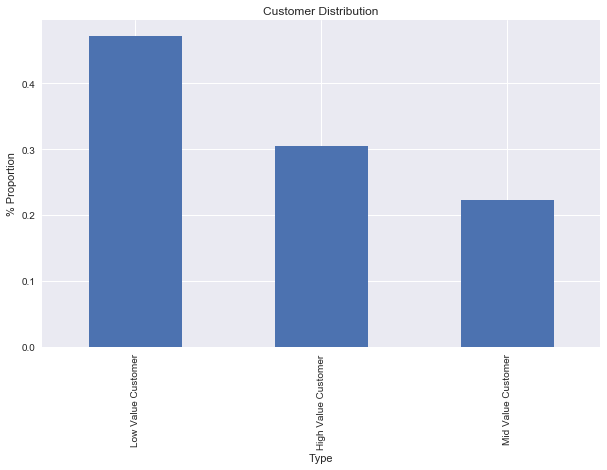

In [64]:
plt.figure(figsize=(10,6))
data_FR['type'].value_counts(normalize = True).plot(kind='bar')
plt.title('Customer Distribution')
plt.xlabel('Type')
plt.ylabel('% Proportion')
plt.show()

In [65]:
data = data_FR[['Frequency','Total_Revenue']]
data.head()

,Frequency,Total_Revenue
MASTER_CUSTOMER_NAME,,
77 ELEKTRONIKA KFT,1,1806
ABB INC,3,197984
ADVANCED MP TECHNOLOGY INC.,4,12352
AMPHENOL,4,22739
ATHER ENERGY PRIVATE LIMITED,11,6248051


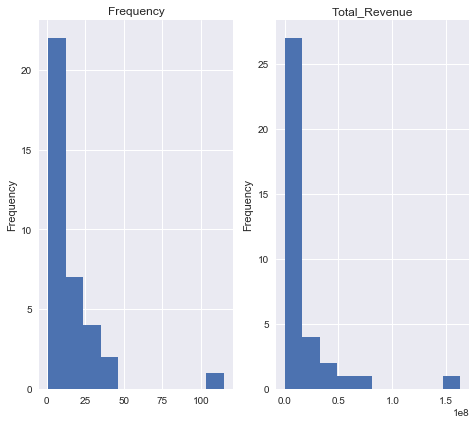

In [66]:
plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
data['Frequency'].plot(kind='hist')
plt.title('Frequency')

plt.subplot(1,3,2)
data['Total_Revenue'].plot(kind='hist')
plt.title('Total_Revenue')

plt.tight_layout()
plt.show()


In [67]:
scaler = StandardScaler()

scaler.fit(data)

data_normalized = scaler.transform(data)

data_normalized = pd.DataFrame(data_normalized, index=data.index, columns=data.columns)

data_normalized.describe().round(2)

,Frequency,Total_Revenue
count,36.00,36.00
mean,0.00,-0.00
std,1.01,1.01
min,-0.63,-0.43
25%,-0.58,-0.43
50%,-0.36,-0.42
75%,0.06,-0.04
max,5.00,4.91


### K-Means algorithm for clustering

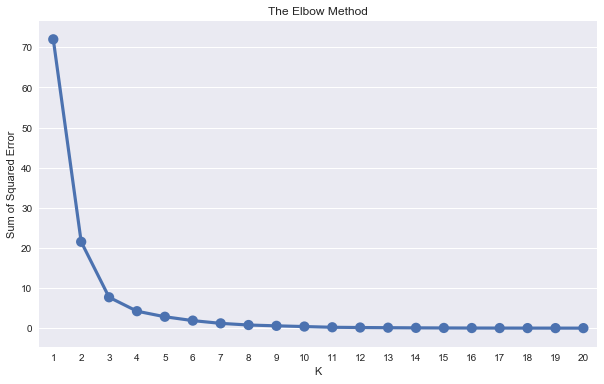

In [68]:
sse={}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_ 

plt.figure(figsize=(10,6))

plt.title('The Elbow Method')

plt.xlabel('K')

plt.ylabel('Sum of Squared Error')

sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [42]:
kmeans = KMeans(n_clusters=3, random_state=1) 

kmeans.fit(data_normalized)

cluster_labels = kmeans.labels_

data_final = data.assign(Cluster=cluster_labels)

data_final.sort_values('Total_Revenue',ascending=False)

,Frequency,Total_Revenue,Cluster
MASTER_CUSTOMER_NAME,,,
PHILIPS MEDICAL SYSTEMS,115,163126586,1
TEJAS NETWORKS LTD,40,78185328,2
ROCHE DIAGNOSTICS,24,50749747,2
NOKIA SOLUTIONS AND NETWORKS OY,13,40224608,2
BULL SAS,31,35159881,2
SANMINA-SCI EDI,29,20911592,2
WABCO INDIA LIMITED,20,19413632,2
WIPRO GE HEALTHCARE PVT LTD,14,18930998,2
LEAX GROUP AB,18,17158113,2


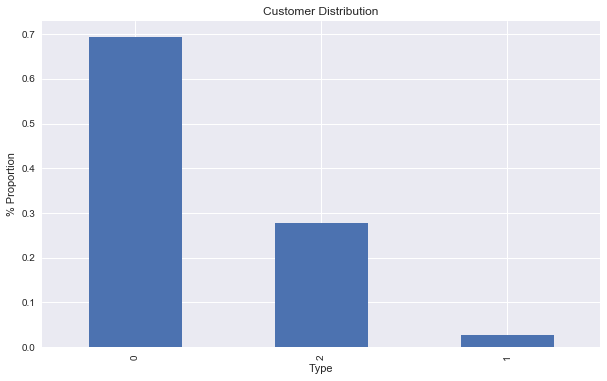

In [43]:
plt.figure(figsize=(10,6))
data_final['Cluster'].value_counts(normalize = True).plot(kind='bar')
plt.title('Customer Distribution')
plt.xlabel('Type')
plt.ylabel('% Proportion')
plt.show()

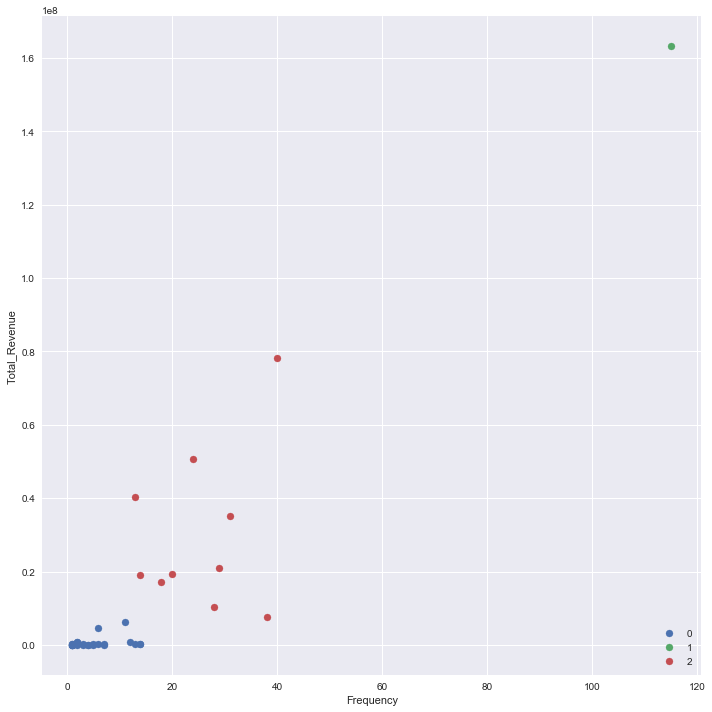

In [82]:
sns.FacetGrid(data_final,hue='Cluster',height=10).map(plt.scatter,"Frequency","Total_Revenue")
plt.legend(loc="lower right")
plt.show()